In [16]:
import wave
import numpy as np
import pandas as pd
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt


In [17]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs  # Nyquist frequency
    low = lowcut / nyq  # Normalize the lowcut frequency
    high = highcut / nyq  # Normalize the highcut frequency
    b, a = butter(order, [low, high], btype='band', analog=False)
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

def low_pass_filter(data, cutoff, fs, order=5):
        nyq = 0.5 * fs
        normal_cutoff = cutoff / nyq
        b, a = butter(order, normal_cutoff, btype='low', analog=False)
        y = filtfilt(b, a, data)
        return y

def high_pass_filter(data, cutoff, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return filtfilt(b, a, data)

In [18]:
with wave.open("single_wheeze_inspire.wav", 'rb') as wav_file:
    num_channels = wav_file.getnchannels()
    sample_width = wav_file.getsampwidth()
    fs = wav_file.getframerate()
    num_frames = wav_file.getnframes()
    duration = num_frames / frame_rate

    frames = wav_file.readframes(num_frames)

print(num_channels)
audio_data = np.frombuffer(frames, dtype=np.int16)
time_axis = np.linspace(0, num_frames / frame_rate, num=num_frames)
print(audio_data)


1
[   0    0    0 ...   71  -98 -249]


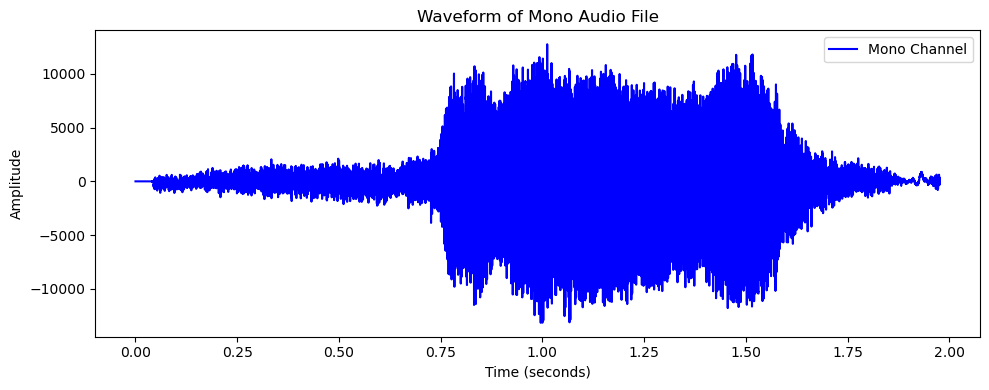

In [19]:
plt.figure(figsize=(10, 4))
plt.plot(time_axis, audio_data, label="Mono Channel", color="blue")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Waveform of Mono Audio File")
plt.legend()
plt.tight_layout()
plt.show()

In [20]:
audio_data = high_pass_filter(audio_data, 7.5, fs, 1)
audio_data = low_pass_filter(audio_data, (fs/2)-100, fs, 8)
audio_data = bandpass_filter(audio_data, 80, 1600, fs, 4)


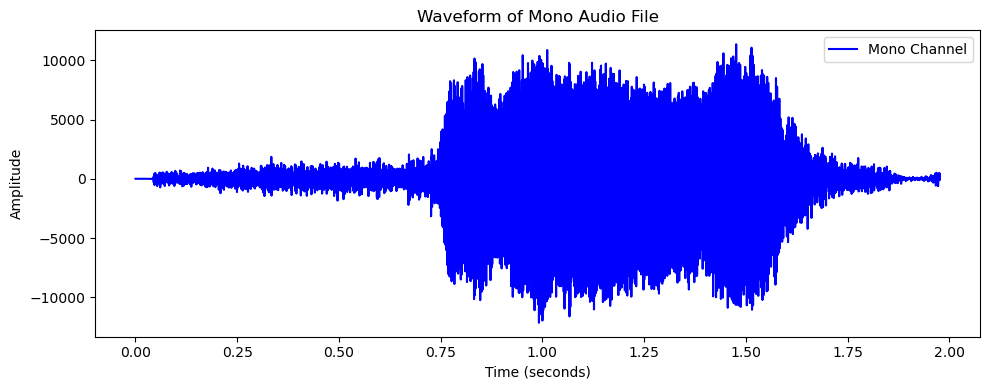

In [21]:
plt.figure(figsize=(10, 4))
plt.plot(time_axis, audio_data, label="Mono Channel", color="blue")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Waveform of Mono Audio File")
plt.legend()
plt.tight_layout()
plt.show()